# Import Packages

In [1]:
import pandas as pd
import sys
import os
import pymc as pm

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

from ev_forecasting_package.data_processing.VehicleRegistrationDataProcessing import VehicleStockModelDataPrepper
from ev_forecasting_package.models.VehicleStockDynamics import VehicleStockDynamicsInferenceModel

# Prepare the vehicle stock data

In [2]:
vehicle_stock_model_data_prepper = VehicleStockModelDataPrepper()
year_quarter = '2023_Q4'
file_names = {
    'stock_eng': f'stock_df_{year_quarter}.csv',
    'additions_eng': f'sales_df_{year_quarter}.csv',
    'v_lsoa': f'v_lsoa_{year_quarter}.csv',
    'icev_lsoa': f'icev_lsoa_{year_quarter}.csv',
    'ev_lsoa': f'ev_lsoa_{year_quarter}.csv',
    'bev_lsoa': f'bev_lsoa_{year_quarter}.csv',
    'phev_lsoa': f'phev_lsoa_{year_quarter}.csv'
}
vehicle_stock_model_data_prepper.prepare_data(
    data_path='../data/large_datasets/vehicle_registrations/processed_data', 
    file_names=file_names, 
    lsoa_subset=20, 
    t_0=2021, # 
    t_0_raw=2020, 
    t_n=2023
)

# Build the vehicle stock dynamics inference model

Create an instance of the model class

In [3]:
model = VehicleStockDynamicsInferenceModel(
    model_variables_dict=vehicle_stock_model_data_prepper.model_variables_dict, 
    annual_data_dict=vehicle_stock_model_data_prepper.annual_data_dict, 
    lsoa_idxs=vehicle_stock_model_data_prepper.lsoa_subset
)

Build the model

In [4]:
model.build_model()

Model built successfully


We can visualise the model using the following helper function from PyMC.

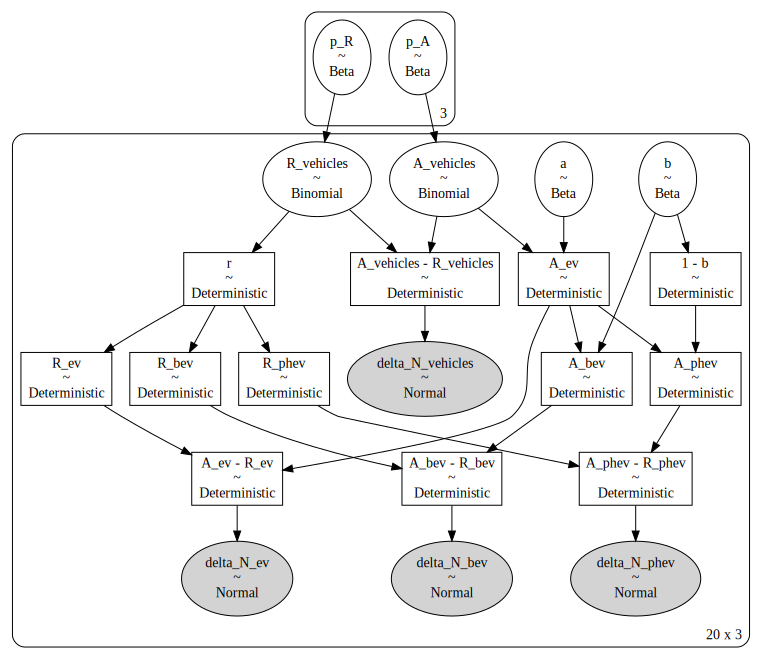

In [11]:
pm.model_to_graphviz(model.model)

# Sample from the model

If this is the first time running the model and you wish to generate new data, you can sample from the model and save the trace as a `.nc` file

In [5]:
trace = model.sample()
model.save_trace('vehicle_stock_dynamics_model_trace.nc')

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p_A, p_R, a, b]
>CompoundStep
>>Metropolis: [A_vehicles]
>>Metropolis: [R_vehicles]


Output()

/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 21 seconds.
/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/isaacflower/miniconda3/envs/EVForecastingTool/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Trace saved to vehicle_stock_dynamics_model_trace.nc


Alternatively, if you wish to load a previously trained model, you can load the trace using the `load_trace` method

In [7]:
model.load_trace('vehicle_stock_dynamics_model_trace.nc')

Trace loaded from vehicle_stock_dynamics_model_trace.nc


Extract the posterior means from the trace.

In [9]:
posterior_means = model.calculate_posterior_means()

Posterior means calculated successfully


We can inspect the posterior means for each variable.

In [10]:
model.posterior_means['a']

,E01014370,E01014371,E01014372,E01014373,E01014374,E01014375,E01014376,E01014377,E01014379,E01014380,E01014381,E01014382,E01014383,E01014384,E01014385,E01014386,E01014387,E01014388,E01014389,E01014390
2021,0.131800,0.199193,0.074459,0.120626,0.183076,0.318467,0.205353,0.189545,0.150427,0.262891,0.271251,0.319523,0.181624,0.130315,0.114268,0.096548,0.298709,0.347484,0.097853,0.007126
2022,0.822365,0.257192,0.055195,0.125678,0.334718,0.334427,0.195973,0.323266,0.274525,0.448993,0.394979,0.417565,0.207292,0.223185,0.209453,0.123292,0.371652,0.483667,0.144440,0.004574
2023,0.248683,0.204153,0.317007,0.104468,0.196602,0.490976,0.262731,0.296171,0.125094,0.549405,0.330201,0.187075,0.131938,0.146300,0.145542,0.151340,0.287838,0.375084,0.096086,0.011950
